# Loan Prediction

### Problem
 The company seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not.
 
 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('loan-prediction.csv')
df.head()

In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [55]:
df.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [8]:
# Fill missing values in LoanAmount with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Fill missing values in Loan_Amount_Term with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

# Fill missing values in Credit_History with the mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

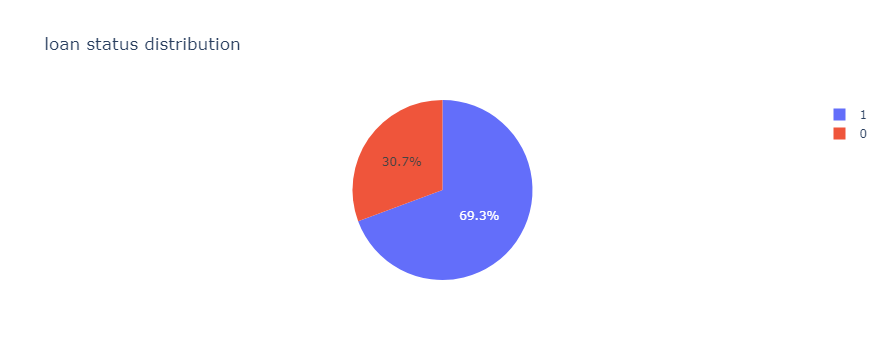

In [65]:
import plotly.express as px

loan_status_count = df['Loan_Status'].value_counts()
loan_status_count

fig = px.pie(df, values =loan_status_count.values,names =loan_status_count.index,
             title = "loan status distribution")
fig.show()

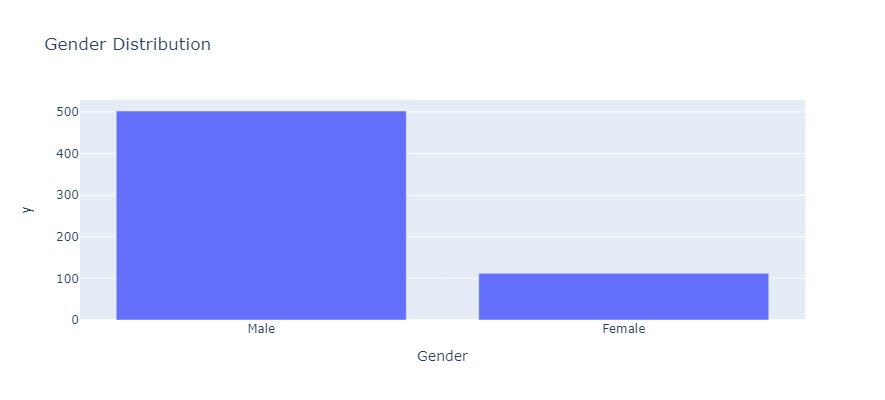

In [10]:
gender_count = df['Gender'].value_counts()
fig_gender = px.bar(gender_count, 
                    x=gender_count.index, 
                    y=gender_count.values, 
                    title='Gender Distribution')
fig_gender.update_layout(width=400, height=400)
fig_gender.show()

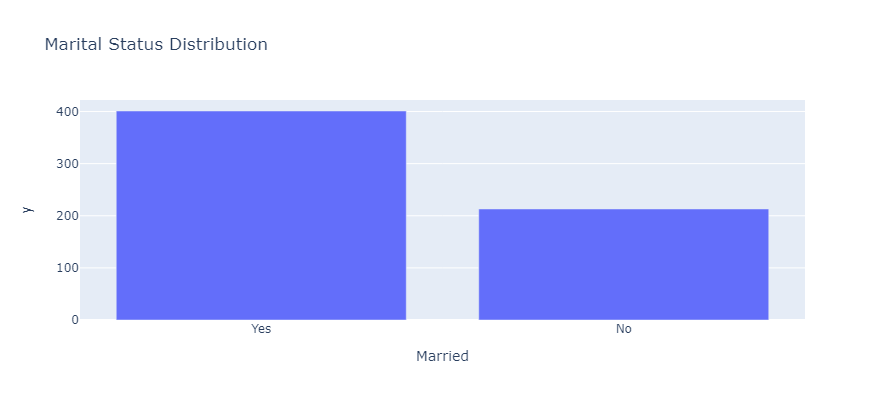

In [11]:
married_count = df['Married'].value_counts()
fig_married = px.bar(married_count, 
                     x=married_count.index, 
                     y=married_count.values, 
                     title='Marital Status Distribution')
fig_married.update_layout(width=400, height=400)
fig_married.show()

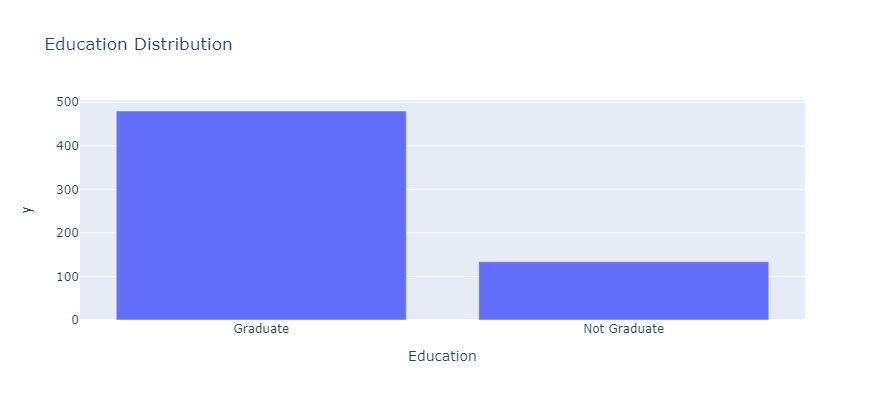

In [12]:
education_count = df['Education'].value_counts()
fig_education = px.bar(education_count, 
                       x=education_count.index, 
                       y=education_count.values, 
                       title='Education Distribution')
fig_education.update_layout(width=400, height=400)
fig_education.show()

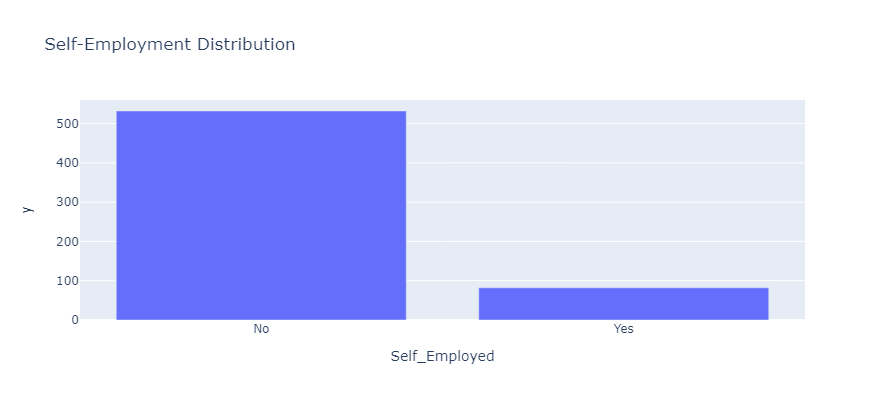

In [13]:
self_employed_count = df['Self_Employed'].value_counts()
fig_self_employed = px.bar(self_employed_count, 
                           x=self_employed_count.index, 
                           y=self_employed_count.values, 
                           title='Self-Employment Distribution')
fig_self_employed.update_layout(width=400, height=400)
fig_self_employed.show()

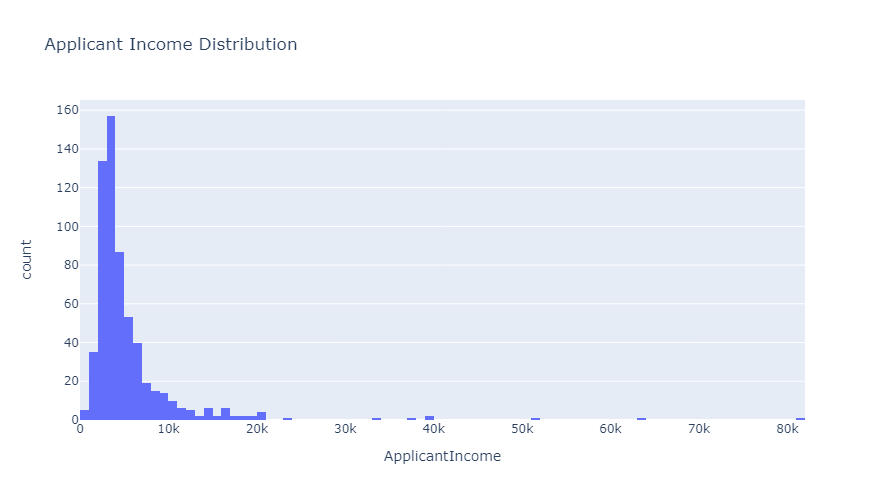

In [14]:
fig_applicant_income = px.histogram(df, x='ApplicantIncome', 
                                    title='Applicant Income Distribution')
fig_applicant_income.update_layout(width=900, height=500)
fig_applicant_income.show()

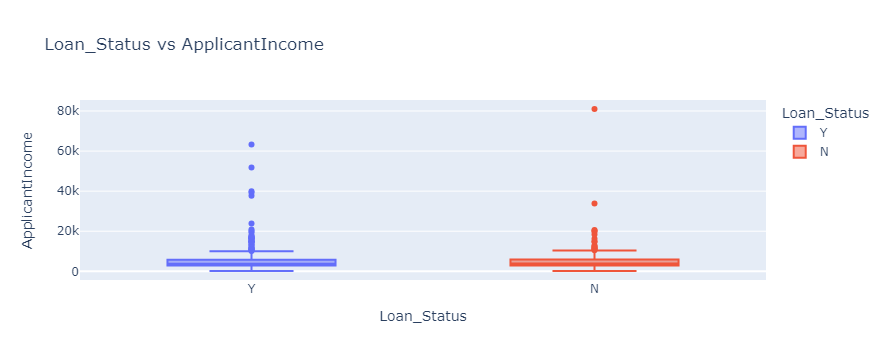

In [15]:
fig_income = px.box(df, x='Loan_Status', 
                    y='ApplicantIncome',
                    color="Loan_Status", 
                    title='Loan_Status vs ApplicantIncome')
fig_income.show()

In [16]:
# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

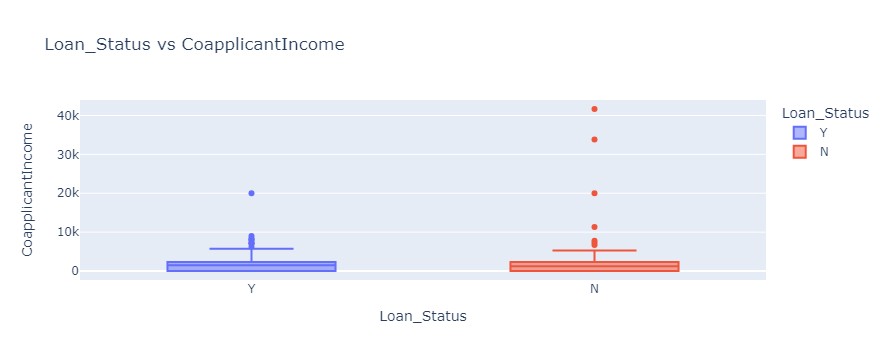

In [17]:
fig_coapplicant_income = px.box(df, 
                                x='Loan_Status', 
                                y='CoapplicantIncome',
                                color="Loan_Status", 
                                title='Loan_Status vs CoapplicantIncome')
fig_coapplicant_income.show()

In [18]:
# Calculate the IQR
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]

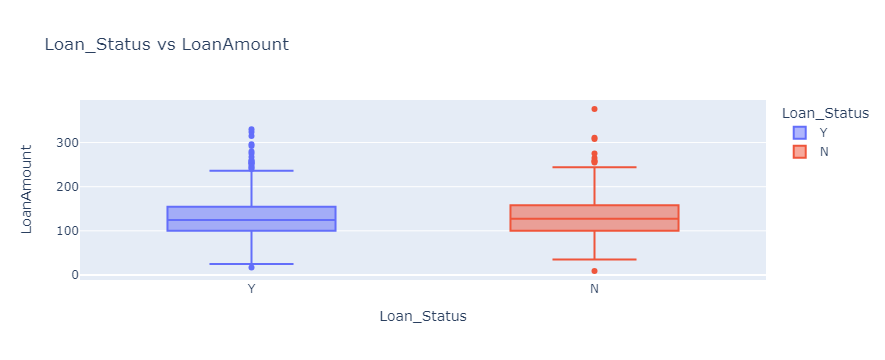

In [19]:
fig_loan_amount = px.box(df, x='Loan_Status', 
                         y='LoanAmount', 
                         color="Loan_Status",
                         title='Loan_Status vs LoanAmount')
fig_loan_amount.show()

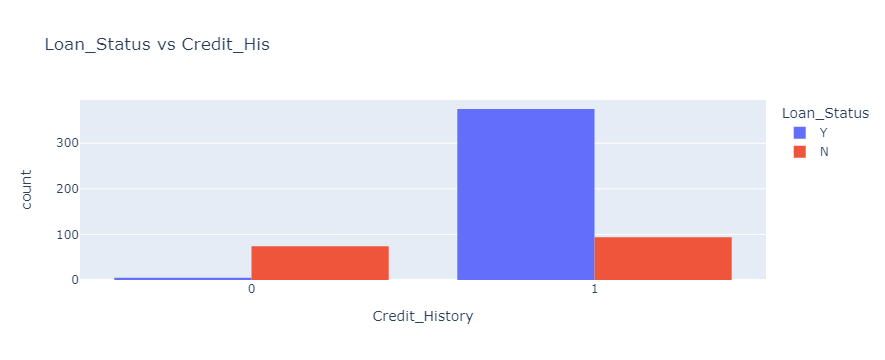

In [20]:
fig_credit_history = px.histogram(df, x='Credit_History', color='Loan_Status', 
                                  barmode='group',
                                  title='Loan_Status vs Credit_His')
fig_credit_history.show()

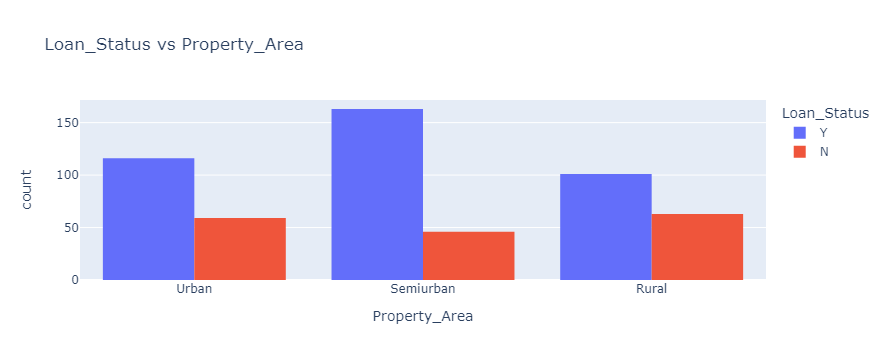

In [21]:
fig_property_area = px.histogram(df, x='Property_Area', color='Loan_Status', 
                                 barmode='group',
                                title='Loan_Status vs Property_Area')
fig_property_area.show()

Drop unused columns and covert categorical to numerical column

In [22]:
df = df.drop('Loan_ID', axis=1)

In [23]:
df.shape

(548, 12)

In [24]:
df['Gender'].nunique()

2

In [25]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for column in df[cat_cols]:
    print(f'{column} :',df[column].nunique(),'unique categorical values')

Gender : 2 unique categorical values
Married : 2 unique categorical values
Dependents : 4 unique categorical values
Education : 2 unique categorical values
Self_Employed : 2 unique categorical values
Property_Area : 3 unique categorical values


In [26]:
df =pd.get_dummies(df, columns=cat_cols)

In [38]:
# Define the mapping dictionary
mapping = {'Y': 1, 'N': 0}

# Map values in the 'status' column
df['Loan_Status'] = df['Loan_Status'].map(mapping)


In [39]:
X =df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [40]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.902588,-0.933096,-0.048562,0.262394,0.410419,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
1,0.238250,0.101980,-0.048562,0.262394,0.410419,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False
2,-0.592435,-0.933096,-1.252014,0.262394,0.410419,False,True,False,True,True,False,False,False,True,False,False,True,False,False,True
3,-0.811258,0.685412,-0.203846,0.262394,0.410419,False,True,False,True,True,False,False,False,False,True,True,False,False,False,True
4,0.981826,-0.933096,0.203775,0.262394,0.410419,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True


In [41]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [42]:
#scale numerical columns
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df[numerical_cols] =scaler.fit_transform(df[numerical_cols])


In [43]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,548.000000
mean,-1.296611e-17,-1.134534e-17,-6.483054e-18,-2.593222e-17,-4.538138e-17,0.693431
std,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,0.461490
min,-2.087984e+00,-9.330959e-01,-2.358413e+00,-5.118207e+00,-2.436536e+00,0.000000
25%,-7.137848e-01,-9.330959e-01,-5.920563e-01,2.623940e-01,4.104187e-01,0.000000
50%,-2.481970e-01,-4.525029e-02,-1.067933e-01,2.623940e-01,4.104187e-01,1.000000
75%,4.570720e-01,6.112819e-01,4.755223e-01,2.623940e-01,4.104187e-01,1.000000
max,3.153781e+00,2.980014e+00,4.765247e+00,2.117774e+00,4.104187e-01,1.000000


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# # Define the parameter grid
# param_grid = {'C': [0.1, 1, 10],
#               'kernel': ['linear', 'rbf'],
#               'gamma': [0.1, 1, 10]}

# # Initialize the SVM classifier
# svm = SVC()

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)


In [46]:
from sklearn.svm import SVC
model=SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [47]:
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision for the positive class ('Y' in this case)
precision = precision_score(y_test, y_pred, pos_label=1)

# Calculate recall for the positive class ('Y' in this case)
recall = recall_score(y_test, y_pred, pos_label=1)

# Calculate F1-score for the positive class ('Y' in this case)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8272727272727273
Precision: 0.8043478260869565
Recall: 0.9866666666666667
F1-score: 0.8862275449101796
Confusion Matrix:
[[17 18]
 [ 1 74]]


In [53]:
import pandas as pd

# Create a DataFrame with original and predicted values
comparison_df = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})

# Display the DataFrame
comparison_df


,Original,Predicted
277,1,1
84,1,1
275,1,1
392,1,1
537,1,1
...,...,...
17,0,0
368,1,1
43,1,1
59,1,1


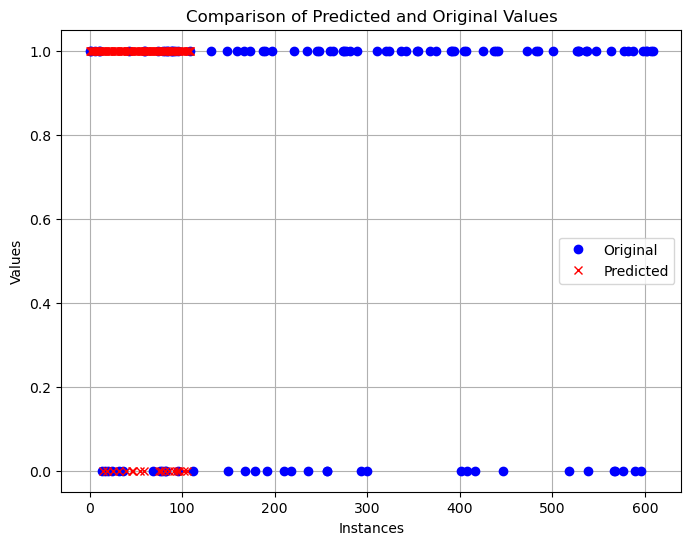

In [56]:
import matplotlib.pyplot as plt

# Plot predicted vs. original values
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Original', marker='o', linestyle='', color='blue')
plt.plot(y_pred, label='Predicted', marker='x', linestyle='', color='red')
plt.xlabel('Instances')
plt.ylabel('Values')
plt.title('Comparison of Predicted and Original Values')
plt.legend()
plt.grid(True)
plt.show()
